# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started
In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [3]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.cross_validation import ShuffleSplit

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))

/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Boston housing dataset has 489 data points with 4 variables each.


/opt/conda/lib/python3.6/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


## Data Exploration
In this first section of this project, you will make a cursory investigation about the Boston housing data and provide your observations. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MEDV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Implementation: Calculate Statistics
For your very first coding implementation, you will calculate descriptive statistics about the Boston housing prices. Since `numpy` has already been imported for you, use this library to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In the code cell below, you will need to implement the following:
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MEDV'`, which is stored in `prices`.
  - Store each calculation in their respective variable.

In [4]:
# TODO: Minimum price of the data
minimum_price = prices.min()

# TODO: Maximum price of the data
maximum_price = prices.max()

# TODO: Mean price of the data
mean_price = prices.mean()

# TODO: Median price of the data
median_price = prices.median()

# TODO: Standard deviation of prices of the data
std_price = prices.std()

# Show the calculated statistics
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${:,.2f}".format(minimum_price)) 
print("Maximum price: ${:,.2f}".format(maximum_price))
print("Mean price: ${:,.2f}".format(mean_price))
print("Median price ${:,.2f}".format(median_price))
print("Standard deviation of prices: ${:,.2f}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,340.28


### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.


** Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? Justify your answer for each.**

**Hint:** This problem can phrased using examples like below.  
* Would you expect a home that has an `'RM'` value(number of rooms) of 6 be worth more or less than a home that has an `'RM'` value of 7?
* Would you expect a neighborhood that has an `'LSTAT'` value(percent of lower class workers) of 15 have home prices be worth more or less than a neighborhood that has an `'LSTAT'` value of 20?
* Would you expect a neighborhood that has an `'PTRATIO'` value(ratio of students to teachers) of 10 have home prices be worth more or less than a neighborhood that has an `'PTRATIO'` value of 15?

  ***Answer:** An increase in average number of rooms among homes in the neighborhood will lead to an increase in the price of home, as a higher average number signals a larger house, as well as other possible features that may come with a large house (pool, large dining room, etc) which make the home much more attractive to buyers, driving the price upwards.
  'An increase in the percentage of homeowners in the neighborhood considered "lower class" is expected to decrease in the price of the home. A higher proportion of working class in a neighborhood makes it probable that homes are smaller, not located in prime areas, as well as may require more maintenance work (leaks, old floors, bad paint, etc). All of which would deter prospective home buyers, lowering the price of the home.
   As the ratio of students to teachers in primary and secondary schools in the neighborhood increases, the price of the home is expected to decrease. The higher the student:teacher ratio, the more students per teacher. This signals overcrowding which begets a lower quality education as well as a worse school experience (overcrowded schools can be a kettle of bad influences). Higher student:teacher ratio also signals a lackluster local government, which correlates with poorer neighborhoods and higher crime rates. All of which would deter families looking for a new home, driving the price downwards.
   
 Note: These are a priori expectations, that shoudl be taken with a grain of salt. It would naive to state what magnitude each variable is expected to have, and which variables are significant or most significant. Always, we must first analyze the data before jumping to hasty conclusions.

----

## Developing a Model
In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 is no better than a model that always predicts the *mean* of the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. _A model can be given a negative R<sup>2</sup> as well, which indicates that the model is **arbitrarily worse** than one that always predicts the mean of the target variable._

For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [5]:
# TODO: Import 'r2_score'
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [6]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))

Model has a coefficient of determination, R^2, of 0.923.


* Would you consider this model to have successfully captured the variation of the target variable? 
* Why or why not?

** Hint: **  The R2 score is the proportion of the variance in the dependent variable that is predictable from the independent variable. In other words:
* R2 score of 0 means that the dependent variable cannot be predicted from the independent variable.
* R2 score of 1 means the dependent variable can be predicted from the independent variable.
* R2 score between 0 and 1 indicates the extent to which the dependent variable is predictable. An 
* R2 score of 0.40 means that 40 percent of the variance in Y is predictable from X.

**Answer:**
   We must be careful when interpreting high R^2 values, particularly for a multiple regression model (as ours is). A high R^2 value, even one close to one, does not necassirly mean our multiple regression model is optimally predicting our dependent variable. Any added feature to our model can only improve our R^2 or, at worst, keep it the same. In short, R^2 will never decrease but can be artificially increased with more features. 
   In this case we have 3 features, we must check that all our variables ('PTRATIO', 'LSTAT', 'RM') are statistically significant. As there is the possibility that some, or all, of our variables are multi-collinear or statistically insignificant, in which case their presence in the model though increases the R^2 value, even if close to one, would actually make the predictve power of our model worse. 
   As an example, suppose there is only one variable, such as house size, that explains the majority of the R^2 value, say 0.92, but loses some of it's significance due to the incorporation of other insignificant variables, such as student:teacher ratio. Incorporating an insignificant variable, will not decrease our original very high R^2 but will likely take away the influence of our house size variable and give some of it to the insignificant variable, making our model worse off. In short, we must check that all our variables incorporated in our model are significant, before deciding whether our high R^2 value means that the dependent variable can be approximately predicted from our independent variables.
   A better measure of proportion of variance in our dependent variable predictable from our features would be the adjusted R^2, which takes into account standard R^2's pitfalls.

### Implementation: Shuffle and Split Data
Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [7]:
# TODO: Import 'train_test_split'
from sklearn.cross_validation import train_test_split

# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size= 0.2, random_state=0)

# Success
print("Training and testing split was successful.")

Training and testing split was successful.


### Question 3 - Training and Testing

* What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?

**Hint:** Think about how overfitting or underfitting is contingent upon how splits on data is done.

 **Answer:** 
   If we considered fitting our model to every example in our dataset, then even though our model might fit our data extremely well (very low error), we are unaware of how well it fares in predicting new examples not found in our dataset. Indeed it is likely that since our model fits our specific training data so well, it is less "generalized", and therefore likely to predict new examples with a significantly higher degree of error than the training error observed on our dataset. 
   Splitting the dataset into training set and testing set is one way to keep us honest from overfitting our model. We aim for a train-test split which gives us two things: 
   1. Keeps us from overfitting our model to our available data. That is generalizing our model to handle well (with low error) new examples introduced into our model.
   2. Allows us to maximize the use of our current available data for our model. Data is good, and we want our model to incorporate as much data as it can, while still avoiding overfitting.
  1 and 2 implies as well that we do not want to go to the other extreme and choose a low train-test ratio (say 50%/50%), as this would over-generalize or over-simplify our model, resulting in both high testing and training errors. All while neglecting to incorporate useful, available data into our model. 
  A good ratio for splitting our data is ~75% and ~25% for our training and testing sets, respectively. This split ratio allows us to train our model on the majority of our available data, while still allowing us a more generalized model that prevents overfitting as well as retaining a subset in which we can honestly evaluate the predictive power of our model(how much error do we see in examples on which we did not train our model on?). 

----

## Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Run the code cell below and use these graphs to answer the following question.

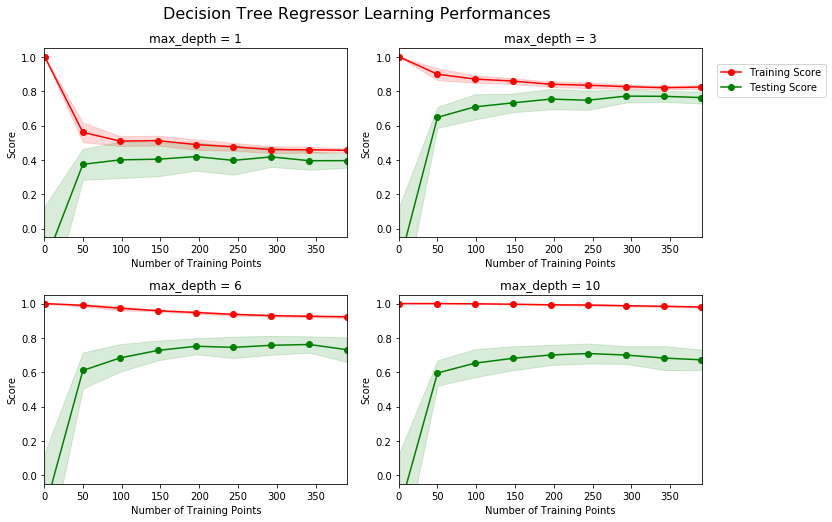

In [8]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Question 4 - Learning the Data
* Choose one of the graphs above and state the maximum depth for the model. 
* What happens to the score of the training curve as more training points are added? What about the testing curve? 
* Would having more training points benefit the model? 

**Hint:** Are the learning curves converging to particular scores? Generally speaking, the more data you have, the better. But if your training and testing curves are converging with a score above your benchmark threshold, would this be necessary?
Think about the pros and cons of adding more training points based on if the training and testing curves are converging.

**Answer:** 
   The above graph of training and test scores of max_depth = 1 is a classic example of a high bias model. Our model is observing high errors in both our training set and test sets, both of which are converging to approximately 0.5 scores - the score one would expect from guessing the mean for all examples. 
   In our high bias model, we can observe from the graph that more data by itself is not going to do the job of improving our model. As with an increasing number of training examples our training and test set errors will not improve, but rather stay relatively the same, as well as high. Thus for a high bias model, our priority lies first in increasing our number of features or increasing the complexity of our model. In this case, increasing our max_depth between 3-5 would add a higher complexity to our model, making it fit more well to the data. Though increasing more than this, as we can see from the max_depth = 10 graph, would lead to overfitting which as well does not our model nor is it improve by increasing data.
   Thus in short, if we see a training-test error graph like max_depth = 1 we should assume our model has high bias, and we should proceed to increase the complexity or number of features in our model (in this case increasing our hyperparamdter max_depth to 3-5), before considering adding more data to our model.

### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

** Run the code cell below and use this graph to answer the following two questions Q5 and Q6. **

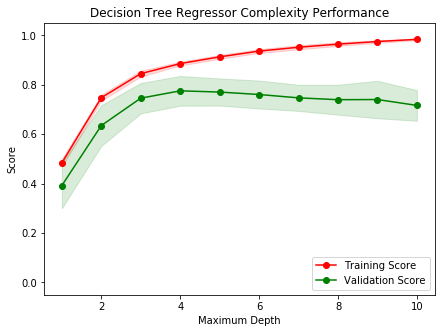

In [9]:
vs.ModelComplexity(X_train, y_train)

### Question 5 - Bias-Variance Tradeoff
* When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? 
* How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?

**Hint:** High bias is a sign of underfitting(model is not complex enough to pick up the nuances in the data) and high variance is a sign of overfitting(model is by-hearting the data and cannot generalize well). Think about which model(depth 1 or 10) aligns with which part of the tradeoff.


**Answer:** 
-When the model is trained with a maximum depth of 1, the model suffers from high bias. We can see this on the graph as when max_depth = 1 both our training set and CV set scores are low, which signals high errors in both our sets. This means our model is "over-generalizing" and is thus doing a poor job fitting our data. We should seek to improve our model by increasing our model's complexity and/or increasing our number of features (in this case increasing our hyperparameter max_depth to 3-5).  
-When the model is trained with a maximum depth of 10, the model suffers from high variance. We can see this from the graph, as when max_depth = 10, our training set score is close to perfect (~1) while our test set score is significantly poorer (~0.7). This signals that our although our model is fitting our training set set perfectly well, it is too specific to our training data, and thus faring poorly when introduced with new examples that were not in our training set (that is the CV score). In the case of high variance, we should seek to generalize our model, that is make it less specific to our training set. We can do this by decreasing the complexity of our model and/or decreasing the number of features (in this case decreasing our max_depth to 3-5, or by other strategies such as implementing the K-fold cross validation technique to train our model. 

### Question 6 - Best-Guess Optimal Model
* Which maximum depth do you think results in a model that best generalizes to unseen data? 
* What intuition lead you to this answer?

** Hint: ** Look at the graph above Question 5 and see where the validation scores lie for the various depths that have been assigned to the model. Does it get better with increased depth? At what point do we get our best validation score without overcomplicating our model? And remember, Occams Razor states "Among competing hypotheses, the one with the fewest assumptions should be selected."

**Answer:** From the graph, the best hyperparameter max_depth value for our model seems to be at max_depth = 4. Why not max_depth 3 or 5?
   Although the training set and CV scores are nearer to each other when max_depth = 3 than when max_depth = 4, both the training and test scores are slightly higher when max_depth = 4 than when max_depth = 3. So although there is a negligible increase in difference between training and CV scores from max_depth 3 to 4, we'll prefer the model with overall better predictive power on both training and CV set, which is max_depth =4.
   The other competing optimal max_depth value would be when max_depth = 5. Even though the training score is higher (that is our training set error is lower) when max_depth = 5, our test score is the same as max_depth = 4, if not worse (albeit negligibly). This can be explained by  our model fitting itself more specifically to the training data, when max_depth = 5, without any improvement in it's predictive power as compared to when max_depth = 4. Of course, this is a sure sign that the improvement in training error came from overfitting- which we should take care to avoid.
   Seeking a more generalized model, and using the principle of occam's razor, we would thus conclude that max_depth = 4 is optimal value of our max_depth hyperparameter for our model, that is where our predictive power is maximized (training score is relatively high and cross validation score is highest) while making the the least assumptions (4 decisions vs 5 decisions).

-----

## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Question 7 - Grid Search
* What is the grid search technique?
* How it can be applied to optimize a learning algorithm?

** Hint: ** When explaining the Grid Search technique, be sure to touch upon why it is used,  what the 'grid' entails and what the end goal of this method is. To solidify your answer, you can also give an example of a parameter in a model that can be optimized using this approach.

**Answer:** The grid search technique is a method used to find what the best values for our parameters are that optimize our model. The 'grid' entails passing a dictionary of parameter(s) names with array(s) of increasing values in order to test our model with each distinct combination or 'grid' of parameters. 
    As an example, for our Decision Tree Regressor above, to find our best max_depth parameter value we can pass  on the dictionary {'max_depth':[1,2,3,4,5,6,7,8,9,10]} to a grid search, that given a regression, e.g. decision tree, and a scorer, e.g. F-1 score, compares between the parameters values passed in the dictionary to find which of our values gives us the best results in our model (based on scorer comparisons). 
    In short, grid search can be applied to our learning algorithm when we are unsure of what the best value or combination of values are for our parameter(s) of our model, by trying out each distinct combination or 'grid' and seeing which parameter value or combination of values gives our model the best result, with respect to a scorer.


### Question 8 - Cross-Validation

* What is the k-fold cross-validation training technique? 

* What benefit does this technique provide for grid search when optimizing a model?

**Hint:** When explaining the k-fold cross validation technique, be sure to touch upon what 'k' is, how the dataset is split into different parts for training and testing and the number of times it is run based on the 'k' value.

When thinking about how k-fold cross validation helps grid search, think about the main drawbacks of grid search which are hinged upon **using a particular subset of data for training or testing** and how k-fold cv could help alleviate that. You can refer to the [docs](http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation) for your answer.

**Answer:** The k-fold cross-validation training technique is a useful way to incorporate all our data into training our model while avoiding using a cross-validation set as well as leaving an honest, untampered test set. It works by splitting our dataset set into k-parts, using k-1 parts as the training set and the remaining part as the test set. We then proceed to train our algorithm k times, each times using a different variation of k-1 parts for the training set and a different remaining part as the test set in which to evaluate our algorithm. Finally, we average out our K-models to obtain our final, more generalized model. (note: it is critical to randomize our data before implementing the k-fold CV technique). 
   Using grid search results will give us the optimal hyperparameter values of our model based off our training set - and therein lies a problem. Our grid search's optimizes parameters values to fit to our training set very well, but they run the risk overfitting our model to the training set and thus resulting in a model that gives poor results in our test sets, and to newly introduced examples. 
   Using the k-fold cross validation technique helps grid search, as in this case grid search gives us the optimized hyperparameter values of the average k model evaluations (each of the k folds of our data). This will help prevent our grid search parameters from overfitting our data exclusively to a specific training set, which ensures our optimal parameters fit a more general model one that fares well with predicting results of new data.


### Implementation: Fitting a Model
Your final implementation requires that you bring everything together and train a model using the **decision tree algorithm**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

In addition, you will find your implementation is using `ShuffleSplit()` for an alternative form of cross-validation (see the `'cv_sets'` variable). While it is not the K-Fold cross-validation technique you describe in **Question 8**, this type of cross-validation technique is just as useful!. The `ShuffleSplit()` implementation below will create 10 (`'n_splits'`) shuffled sets, and for each shuffle, 20% (`'test_size'`) of the data will be used as the *validation set*. While you're working on your implementation, think about the contrasts and similarities it has to the K-fold cross-validation technique.

Please note that ShuffleSplit has different parameters in scikit-learn versions 0.17 and 0.18.
For the `fit_model` function in the code cell below, you will need to implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) from `sklearn.grid_search` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

In [10]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    # Create cross-validation sets from the training data
    # sklearn version 0.18: ShuffleSplit(n_splits=10, test_size=0.1, train_size=None, random_state=None)
    # sklearn versiin 0.17: ShuffleSplit(n, n_iter=10, test_size=0.1, train_size=None, random_state=None)
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth':[1,2,3,4,5,6,7,8,9,10]}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)
    
    # TODO: Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    grid = GridSearchCV(regressor, params, scoring = scoring_fnc, cv = cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

/opt/conda/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Question 9 - Optimal Model

* What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?  

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [11]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 4 for the optimal model.


** Hint: ** The answer comes from the output of the code snipped above.

**Answer: ** 4

### Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |

* What price would you recommend each client sell his/her home at? 
* Do these prices seem reasonable given the values for the respective features? 

**Hint:** Use the statistics you calculated in the **Data Exploration** section to help justify your response.  Of the three clients, client 3 has has the biggest house, in the best public school neighborhood with the lowest poverty level; while client 2 has the smallest house, in a neighborhood with a relatively high poverty rate and not the best public schools.

Run the code block below to have your optimized model make predictions for each client's home.

In [12]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

Predicted selling price for Client 1's home: $391,183.33
Predicted selling price for Client 2's home: $189,123.53
Predicted selling price for Client 3's home: $942,666.67


In [25]:
# Stats of the data
mean_rooms = features['RM'].mean()
median_str = features['PTRATIO'].median()
median_working = features['LSTAT'].median()
mean_price = prices.mean()
max_price = prices.max()
min_price = prices.min()
median_price = prices.median()
std_price = prices.std()
std_rooms = features['RM'].std()
max_str = features['PTRATIO'].max()
max_working = features['LSTAT'].max()




# Show the calculated statistics
print("Statistics for Boston housing prices:\n")
print("Mean price: ${:,.2f}".format(mean_price))
print("Median price ${:,.2f}".format(median_price))
print("Max price ${:,.2f}".format(max_price))
print("Min price ${:,.2f}".format(min_price))
print("Standard deviation of prices: ${:,.2f}".format(std_price))

print("Statistics for Boston housing features:\n")
print("Mean # of rooms: {:,.2f}".format(mean_rooms))
print("Standard deviation of # of rooms: {:,.2f}".format(std_rooms))
print("Median Neighborhood Poverty (%): class {:,.2f}".format(median_working))
print("Median Student:Teacher ratio: {:,.2f}".format(median_str))
print("Max Student:Teacher ratio: {:,.2f}".format(max_str))
print("Max % Working Class: {:,.2f}".format(max_working))


Statistics for Boston housing dataset:

Mean price: $454,342.94
Median price $438,900.00
Max price $1,024,800.00
Min price $105,000.00
Standard deviation of prices: $165,340.28

Mean # of rooms: 6.24
Standard deviation of # of rooms: 0.64
Median Neighborhood Poverty (%): class 11.69
Median Student:Teacher ratio: 19.10
Max Student:Teacher ratio: 22.00
Max % Working Class: 37.97


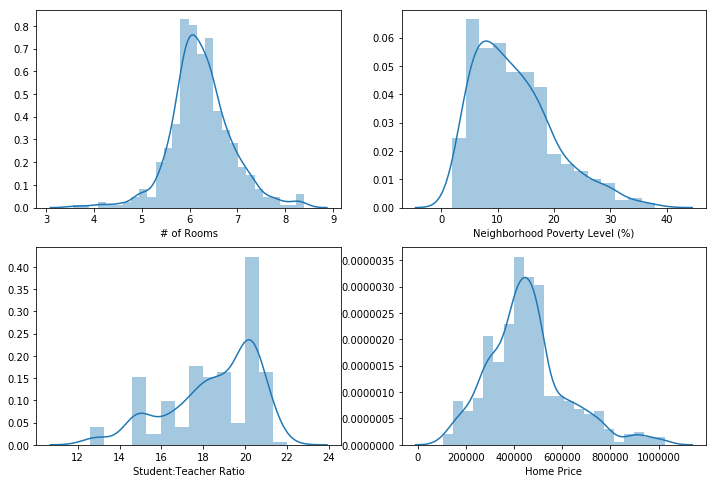

In [23]:
#make a distribution/histogram plot to visualize our data
import seaborn as sns
import matplotlib.pyplot as plt
f, axes = plt.subplots(2, 2, figsize=(12,8))
distr1 = sns.distplot(features['RM'],axlabel ='# of Rooms', ax = axes[0][0])
distr2 = sns.distplot(features['LSTAT'], axlabel ='Neighborhood Poverty Level (%)', ax = axes[0][1])
distr3 = sns.distplot(features['PTRATIO'],axlabel ='Student:Teacher Ratio', ax = axes[1][0])
distr4 = sns.distplot(prices, axlabel ='Home Price', ax = axes[1][1])

**Answer:** 

-Client 1: The number of rooms of Client 1’s home (5) is a little over two standard deviations (0.64) below the mean number of rooms (6.32). Client 1's home is located in a neighborhood whose poverty level (17%) is about 6% above the median neighborhood poverty level of 11.7% as well in a neighborhood with a Student:Teacher ratio of 15-to-1 which is lower than the median Student:Teacher ratio of 19-to-1. In short, Client 1's home can be classified as being slightly below the "median" home of our dataset. Taking into account that the median home of our dataset is priced at $438,900, I would recommend Client 1 to price his home slightly below that. Which is not far of from what our model predicts the price of Client 1’s home to be as $391,183.33.

-Client 2: Client 2's home is in a rough spot. We can see from the Student:Teacher ratio distribution and Percent Working Class chart above, that client 2 has his home located in the neighborhood with one of the highest % Neighborhood Poverty level as well as the maximum Student:Teacher ratio (22-to-1), signaling that Client’ 2’s home is located in one of the worst neighborhoods from our dataset. Furthermore Client 2's home has 4 rooms, which is over 3.5 standard deviations (0.64) below the mean number of rooms (6.24), signaling that Client 2 has one of the smallest homes from the dataset. In short, Client 2 has one of the smallest homes in one of the worst neighborhoods, and thus I would recommend Client 2 to sell his home at a price a little above the minimum of home prices ($105,000). Which would be close to our model's predicted price of $189,123.

-Client 3: We can see from the Student:Teacher distribution and Percent Poverty Level chart above, we see that client 3 has a home in the neighborhood with the minimum level of neighborhood poverty  (3 percent) as well as the minimum Student-teacher ratio (12-to-1) of our dataset. In other words, client 3's home is located in the very best of all the neighborhoods from our data. Furthermore, Client 3's home has 8 rooms, which is 3 standard deviations (0.64) above from the mean number of rooms (6.24), signaling Client 3 has one of the largest homes from the dataset. In short, Client 3 has one of the most biggest homes in the most lucrative neighborhood, and thus I would recommend Client 3 should price his home of very close to the maximum market price of $1.024 million, that is a little higher than our model's predicted price of $942,666.

Based off the three given features, the home prices our model predicts for all 3 clients appear to be reasonable. A problem lies in that perhaps 3 features do not tell the whole of what a home's true price is.

***Note: 
Since % Neighborhood Poverty Level and Student:Teacher ratio distributions are skewed, it was more appropriate to use the median as our evaluation metric as our mean and std. deviation values are biased by outliers.
Vice Versa, since our # of rooms distribution is approximately normal, it is not unwise to use mean and standard deviation as metrics for evaluation).

### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. 

**Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with respect to the data it's trained on.**

In [15]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $419,700.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $413,334.78
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $69,044.61


### Question 11 - Applicability

* In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.  

**Hint:** Take a look at the range in prices as calculated in the code snippet above. Some questions to answering:
- How relevant today is data that was collected from 1978? How important is inflation?
- Are the features present in the data sufficient to describe a home? Do you think factors like quality of apppliances in the home, square feet of the plot area, presence of pool or not etc should factor in?
- Is the model robust enough to make consistent predictions?
- Would data collected in an urban city like Boston be applicable in a rural city?
- Is it fair to judge the price of an individual home based on the characteristics of the entire neighborhood?

**Answer:**
     Firstly, our dataset of homes specifically comes from various suburbs in Boston, that is our model was trained on data exclusively form suburban homes in Boston. To apply the same model trained with this specific data and use it to predict home prices in say the city of Boston or any other city, or even to any other city suburb other than Boston, would be highly inappropriate. 
    More than this, the constructed model has many flaws that when understood puts doubt on it's utility in a suburban Boston realtor's office, let alone a real-world setting. First of all, our model omits many important features that explain the price of a home, thus oversimplifying the prediction of the price of a home. Hence, as seen above, an average price of $405k with a wide range in price of $73k for the same home is flag that our model contains high bias and therefore cannot be a considered robust model to be relied upon to make consistent, accurate predictions. Here are a few parameters that any real estate model must include in order to accurately predict the price of home, and that our own model glaringly neglects:

-Year of construction: These houses are from 1978 and older. Today they would be over 40 years old, which would, holding all else constant, significantly decrease their value today. Older houses, in general, need a substantial more amount of work done, require a higher level of maintenance upkeep, and have architecture/aesthetic/fashion that may not be pleasing to a modern buyer. The fact that our model omits the year of construction of the house, that is it's age, is a flaw.

-Location: In real estate it is said location is everything. Although we do have two indirect parameters that explain some of the location feature such as student:pupil ratio and percent of working poor in the neighborhood, these do not seem to cover all the bases of the role location plays in the price of a home. A suburban home cost may significantly differ from that of a house in the city, likewise a downtown apartment will cost significantly more than one in an industrial area of the city. Proximity to main streets, public parks, schools, working center, the beach, neighborhood amenities, and more all are significant variables that can explain how much a home is priced.

-Market Demand: the market environment can also be seen as an invisible though powerful feature that significantly influences the price of a home. For example if there is a national or local recession, when a local factory closes or when banks increase mortgage interest rates- all of these factors drive the demand of homes down, driving price down with them, regardless of all other features. Likewise, when there is a local or national economic boom, when interest rates are low, when the area is up-and-coming with lots of real estate projects developing, all of these significantly drive up the demand for homes, driving price up with them, again regardless of all other features of a home. The given market environment cannot be underestimated, let alone ignored if we are to accurately predict the price of a home at a point in time.

-Crime rate of a neighborhood: A large house with many rooms, sitting in a high crime zone area will go for a significantly lower price in the market, regardless of anything else. That is because homeowners are willing to sell much cheaper to get out of the area, while very few people are willing to buy homes in high crime areas.


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.